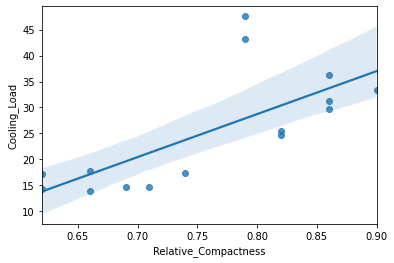

In [25]:
import pandas as pd
import seaborn as sns

df=pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx')
#rename columns
column_names = {'X1':'Relative_Compactness', 'X2': 'Surface_Area', 
                'X3':  'Wall_Area', 'X4': 'Roof_Area', 'X5': 'Overall_Height',
                'X6': 'Orientation', 'X7': 'Glazing_Area', 
                'X8': 'Glazing_Area_Distribution', 
                'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}


df = df.rename(columns=column_names)
#select a sample of the dataset
simple_linear_reg_df = df[['Relative_Compactness', 'Cooling_Load']].sample(15, random_state=2)
#regression plot
sns.regplot(x="Relative_Compactness", y="Cooling_Load",
            data=simple_linear_reg_df)

In [26]:

#Firstly, we normalise our dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
features_df = normalised_df.drop(columns=['Heating_Load', 'Cooling_Load'])
heating_target = normalised_df['Heating_Load']

In [27]:
#Now, we split our dataset into the training and testing dataset. Recall that we had earlier segmented the features and target variables.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, heating_target, test_size=0.3, random_state=1)

In [28]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)
#obtain predictions
predicted_values = linear_model.predict(x_test)


In [29]:
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3)

0.063

In [30]:
#R-Squared
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 3)

0.893

In [31]:
#Residual Sum of Squares
import numpy as np
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 3)

1.823

In [32]:
#Root Mean Squared Error
from sklearn.metrics import  mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3) 

0.089

In [33]:

#Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)

#Feature Selection and Lasso Regression
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)



Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [35]:



#comparing the effects of regularisation
def get_weights_df(model, feat, col_name):
  #this function returns the weight of every feature
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df



linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,Surface_Area,-6.387091e+12,-0.062275,0.000000
1,Relative_Compactness,-6.064125e-01,-0.283471,-0.027719
2,Orientation,-2.822876e-03,0.003369,0.000000
3,Glazing_Area_Distribution,1.913548e-02,0.029088,0.021431
4,Glazing_Area,2.295933e-01,0.212449,0.206132
5,Overall_Height,3.852539e-01,0.442467,0.463482
6,Wall_Area,3.725803e+12,0.103061,0.200087
7,Roof_Area,4.790318e+12,-0.163192,-0.000000


QUIZ ASSESSMENT

In [49]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')


In [50]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [45]:
#Firstly, we normalise our dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_df = df.drop(columns=['date','lights'])
normalised_df = pd.DataFrame(scaler.fit_transform(feature_df), columns=feature_df.columns)



In [51]:
#checking normalised dataset
normalised_df.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.046729,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,0.381691,0.381070,0.841827,0.170594,0.653428,0.173329,0.661412,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.046729,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,0.381691,0.375443,0.839872,0.170594,0.651064,0.173329,0.660155,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.037383,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,0.380037,0.367487,0.830704,0.170594,0.646572,0.173329,0.655586,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.037383,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,0.380037,0.363800,0.833401,0.164310,0.641489,0.164175,0.650788,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.046729,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,0.380037,0.361859,0.848264,0.170594,0.639362,0.164175,0.650788,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


In [54]:
new_normalised_df = normalised_df.drop(columns=['Appliances'])
appliances_target = normalised_df['Appliances']

In [55]:
new_normalised_df.head()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,0.381691,0.381070,0.841827,0.170594,0.653428,0.173329,0.661412,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,0.381691,0.375443,0.839872,0.170594,0.651064,0.173329,0.660155,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,0.380037,0.367487,0.830704,0.170594,0.646572,0.173329,0.655586,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,0.380037,0.363800,0.833401,0.164310,0.641489,0.164175,0.650788,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,0.380037,0.361859,0.848264,0.170594,0.639362,0.164175,0.650788,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


In [56]:
appliances_target.head()

0    0.046729
1    0.046729
2    0.037383
3    0.037383
4    0.046729
Name: Appliances, dtype: float64

In [57]:
#Now, we split our dataset into the training and testing dataset.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(new_normalised_df, appliances_target, test_size=0.3, random_state=42)

In [58]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)
#obtain predictions
predicted_values = linear_model.predict(x_test)

In [60]:
#importing metrics for evaluation
from sklearn import metrics

In [61]:
print ('Mean Absolute Error is ', metrics.mean_absolute_error(y_test,predicted_values))
print ('Mean Square Error is ' , metrics.mean_squared_error(y_test, predicted_values))
print ('Root Mean Square Error is ', np.sqrt(metrics.mean_squared_error(y_test,predicted_values)))
print ('R2 Score is ', metrics.r2_score(y_test,predicted_values))


Mean Absolute Error is  0.05013362397742955
Mean Square Error is  0.007658778867195367
Root Mean Square Error is  0.0875144494766171
R2 Score is  0.14890246319303535


In [88]:
#Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)



Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [89]:
#Feature Selection and Lasso Regression
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [69]:


X = normalised_df[['T2']]
y = normalised_df['T6']
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

regr = linear_model.LinearRegression()
regr.fit(X, y)
print ('R2 Score is ', round(metrics.r2_score(X,y),2))


R2 Score is  0.16


In [75]:
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(X,y)
round(mae, 2)

0.12

In [80]:
print('Root Mean Square Error is ', round(np.sqrt(metrics.mean_squared_error(X,y)),3))

Root Mean Square Error is  0.146


In [86]:
#coefficient of determination
print ('coefficient of determination is ', round(metrics.r2_score(X,y),2))

coefficient of determination is  0.16


In [90]:

#Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(X, y)



Ridge(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [91]:
#Feature Selection and Lasso Regression
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X, y)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [94]:
#Residual Sum of Squares
import numpy as np
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 3)

808.96